## 6.Neural Network:

In [ ]:
input_dim=X_train_selected.shape[1]
print(input_dim)

13


In [ ]:
nn_model = Sequential([
    Dense(128, activation='relu',input_shape=(input_dim,)),  # Input layer with 128 neurons
    Dropout(0.2),  # Dropout for regularization to decrease overfiting
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    Dropout(0.2),
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dropout(0.2),
    Dense(len(uniqueClasses), activation='softmax')  # Output layer with softmax for classification
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
nn_model.compile(optimizer='adam',  # Adaptive Moment Estimation optimizer
                 loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
                 metrics=['accuracy'])

In [ ]:
# Train the model
start_time = time.time()
nn_history = nn_model.fit(X_train_selected, Y_train, 
                          epochs=10,  # Number of epochs
                          batch_size=32,  # Batch size
                          validation_split=0.2,  # Use 20% of the training data for validation
                          verbose=1)
training_time_nn = time.time() - start_time
print(f'Training time: {training_time_nn:.2f} seconds')


Epoch 1/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9542 - loss: 0.1281 - val_accuracy: 0.9783 - val_loss: 0.0441
Epoch 2/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9787 - loss: 0.0478 - val_accuracy: 0.9805 - val_loss: 0.0398
Epoch 3/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9791 - loss: 0.0439 - val_accuracy: 0.9808 - val_loss: 0.0392
Epoch 4/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9795 - loss: 0.0434 - val_accuracy: 0.9803 - val_loss: 0.0407
Epoch 5/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9795 - loss: 0.0428 - val_accuracy: 0.9807 - val_loss: 0.0380
Epoch 6/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9802 - loss: 0.0420 - val_accuracy: 0.9810 - val_loss: 0.0377
Epoch 7/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9806 - loss: 0.0413 - val_accuracy: 0.9814 - val_loss: 0.0368
Epoch 8/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9806 - loss: 0

In [ ]:
# Save the model
joblib.dump(nn_model,'/kaggle/working/NN.pkl')

['/kaggle/working/NN.pkl']

In [ ]:
# Evaluate the model on the test set
start_time = time.time()
test_loss, test_accuracy = nn_model.evaluate(X_test_selected, Y_test)
testing_time_nn = time.time() - start_time
print(f'Testing time: {testing_time_nn:.2f} seconds')
print(f'Test Accuracy: {test_accuracy:.4f}')

2342/2342 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9818 - loss: 0.0373
Testing time: 2.88 seconds
Test Accuracy: 0.9822


In [ ]:
# Predict on the test set
y_pred_nn = nn_model.predict(X_test_selected)
y_pred_classes = y_pred_nn.argmax(axis=-1)


2342/2342 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [ ]:
y_pred_nn

array([[6.4546675e-14, 7.9414111e-09, 1.5467798e-09, 9.9796665e-01,
        2.0334215e-03],
       [1.1319224e-13, 8.5330969e-09, 2.2830295e-09, 9.9787146e-01,
        2.1285526e-03],
       [2.6564984e-14, 4.1044510e-09, 9.6271913e-10, 9.9793226e-01,
        2.0677252e-03],
       ...,
       [3.4094053e-32, 1.3602062e-21, 2.1609409e-18, 9.9999928e-01,
        7.1825156e-07],
       [6.3487572e-13, 2.4526939e-08, 5.9462053e-09, 9.9763489e-01,
        2.3651202e-03],
       [1.0660597e-04, 3.2379207e-11, 9.9875605e-01, 3.7128074e-04,
        7.6611206e-04]], dtype=float32)

In [ ]:
y_pred_classes

array([3, 3, 3, ..., 3, 3, 2])

#### Model's Evaluation:

In [ ]:
accuracy_nn = accuracy_score(Y_test, y_pred_classes)
balanced_accuracy_nn = balanced_accuracy_score(Y_test, y_pred_classes)
precision_nn = precision_score(Y_test, y_pred_classes, average='weighted')
recall_nn = recall_score(Y_test, y_pred_classes, average='weighted')
f1_nn = f1_score(Y_test, y_pred_classes, average='weighted')
roc_auc_nn = roc_auc_score(Y_test, y_pred_nn, multi_class='ovr')
mcc_nn = matthews_corrcoef(Y_test, y_pred_classes)


In [ ]:
print(f"Accuracy: {accuracy_nn:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_nn:.4f}")
print(f"Precision: {precision_nn:.4f}")
print(f"Recall: {recall_nn:.4f}")
print(f"F1-score: {f1_nn:.4f}")
print(f"ROC-AUC: {roc_auc_nn:.4f}")
print(f"Matthews Correlation Coefficient: {mcc_nn:.4f}")

Accuracy: 0.9822
Balanced Accuracy: 0.9055
Precision: 0.9851
Recall: 0.9822
F1-score: 0.9822
ROC-AUC: 0.9943
Matthews Correlation Coefficient: 0.8983


* High Accuracy: The model achieves an excellent 98.22% accuracy, showing it performs very well overall.
* Good Balanced Performance: The balanced accuracy of 90.55% suggests that the model is effective at handling both majority and minority classes, making it robust in dealing with class imbalances.
* Excellent Precision and Recall: The precision (98.51%) and recall (98.22%) scores are both very high, indicating that the model is both accurate when it predicts positive instances and effective at identifying positive instances.
* Strong Discriminatory Power: The ROC-AUC of 99.43% indicates that the model is great at distinguishing between different classes, which is essential for tasks involving classification.
* High Consistency: The MCC score of 89.83% shows that the model has a strong and consistent correlation between predicted and actual values, further validating its overall performance.

In [ ]:
# Classification report
print("\nClassification Report:\n")
print(classification_report(Y_test, y_pred_classes, target_names=encoder.categories_[0]))


Classification Report:

              precision    recall  f1-score   support

   Blackhole       0.67      0.94      0.78      2010
    Flooding       0.91      1.00      0.95       662
    Grayhole       0.92      0.66      0.77      2919
      Normal       1.00      1.00      1.00     68014
        TDMA       0.99      0.93      0.96      1328

    accuracy                           0.98     74933
   macro avg       0.90      0.91      0.89     74933
weighted avg       0.99      0.98      0.98     74933



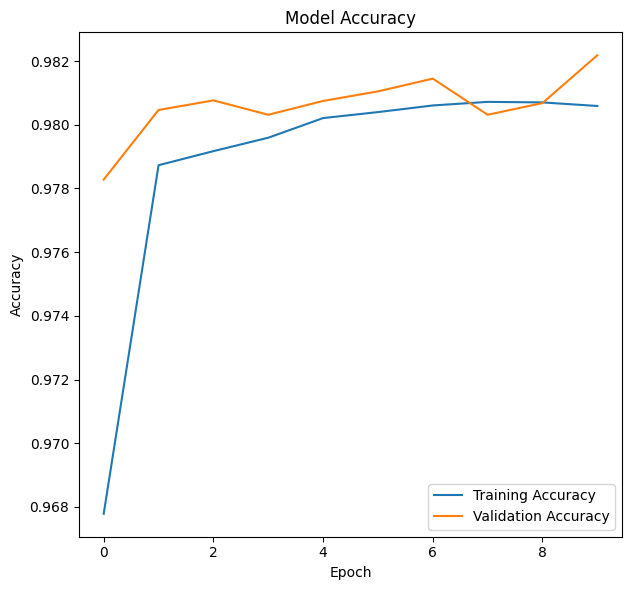

In [ ]:
# Assuming 'history' is the variable that stores the training history
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(nn_history.history['accuracy'])
plt.plot(nn_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
# Show the plots
plt.tight_layout()
plt.show()

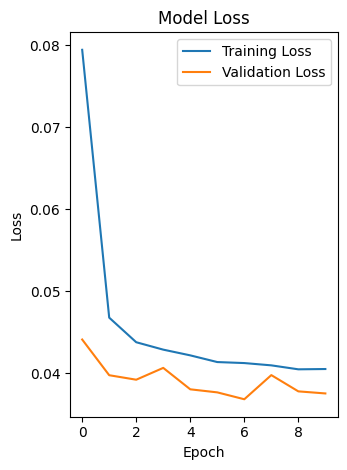

In [ ]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(nn_history.history['loss'])
plt.plot(nn_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
cm_NN = confusion_matrix(Y_test, y_pred_classes)
print("Confusion Matrix:\n", cm_NN)

Confusion Matrix:
 [[ 1891     0   118     0     1]
 [    0   660     0     2     0]
 [  948     0  1941    27     3]
 [    1    68    59 67877     9]
 [    0     0     1    96  1231]]


**Class 1 (Row 1):**
* 1891 instances of Class 1 are correctly classified as Class 1.
* 118 instances of Class 1 are misclassified as Class 3.
* 1 instance of Class 1 is misclassified as Class 5.
* No misclassifications to Class 2 or Class 4.

**Class 2 (Row 2):**
* 660 instances of Class 2 are correctly classified as Class 2.
* 2 instances of Class 2 are misclassified as Class 4.
* No misclassifications to Class 1, Class 3, or Class 5.

**Class 3 (Row 3):**
* 1941 instances of Class 3 are correctly classified as Class 3.
* 948 instances of Class 3 are misclassified as Class 1.
* 27 instances of Class 3 are misclassified as Class 4.
* 3 instances of Class 3 are misclassified as Class 5.
* No misclassification to Class 2.

**Class 4 (Row 4):**
* 67877 instances of Class 4 are correctly classified as Class 4.
* 68 instances of Class 4 are misclassified as Class 2.
* 59 instances of Class 4 are misclassified as Class 3.
* 9 instances of Class 4 are misclassified as Class 5.
* 1 instance of Class 4 is misclassified as Class 1.

**Class 5 (Row 5):**
* 1231 instances of Class 5 are correctly classified as Class 5.
* 96 instances of Class 5 are misclassified as Class 4.
* 1 instance of Class 5 is misclassified as Class 3.
* 0 misclassifications to Class 1 or Class 2.

In [ ]:
loss_NN = log_loss(Y_test, y_pred_nn)
print(f"Log Loss: {loss_NN}")

Log Loss: 0.03801969376409092


Log Loss of 0.0380 is very low, which suggests that the model is highly confident in its predictions and making very accurate decisions.

In [ ]:
data.loc["NN"] = [f"{training_time_nn:.4f}",
                  f"{testing_time_nn:.4f}",
                  f"{accuracy_nn:.4f}",
                  f"{balanced_accuracy_nn:.4f}",
                  f"{precision_nn:.4f}",
                  f"{recall_nn:.4f}",f"{f1_nn:.4f}",
                  f"{roc_auc_nn:.4f}",
                  f"{mcc_nn:.4f}",
                  f"{loss_NN:.4f}"]
data.to_excel('/kaggle/working/modelsEvaluation.xlsx')

In [ ]:
# Calculate True Positive Rate (TPR) and False Positive Rate (FPR) for each class
tpr_nn = []
fpr_nn = []

# For each class
for i in range(cm_NN.shape[0]):
    tp = cm_NN[i, i]  # True Positive for class i
    fn = cm_NN[i, :].sum() - tp  # False Negatives for class i
    fp = cm_NN[:, i].sum() - tp  # False Positives for class i
    tn = cm_NN.sum() - (tp + fn + fp)  # True Negatives for class i
    
    tpr = tp / (tp + fn)  # True Positive Rate (Recall) for class i
    fpr = fp / (fp + tn)  # False Positive Rate for class i
    
    tpr_nn.append(tpr)
    fpr_nn.append(fpr)

    print(f"Class {i}: TPR = {tpr:.4f}, FPR = {fpr:.4f}")

Class 0: TPR = 0.9408, FPR = 0.0130
Class 1: TPR = 0.9970, FPR = 0.0009
Class 2: TPR = 0.6650, FPR = 0.0025
Class 3: TPR = 0.9980, FPR = 0.0181
Class 4: TPR = 0.9270, FPR = 0.0002


* Class 1 and Class 3 perform exceptionally well with high TPR (99.70% and 99.80%), though Class 3 has a relatively high FPR (1.81%) compared to the others. This means the model is highly effective in identifying these classes but has a moderate level of misclassifications for Class 3.
* Class 0 and Class 4 also perform well, with TPR values of 94.08% and 92.70%, respectively. Both classes have low FPRs, indicating that the model does a good job distinguishing these classes from others.
* Class 2 has the lowest TPR (66.50%), suggesting that the model struggles more to identify this class. However, the FPR (0.25%) is relatively low, so the model's misclassification of other classes as Class 2 is not as frequent.

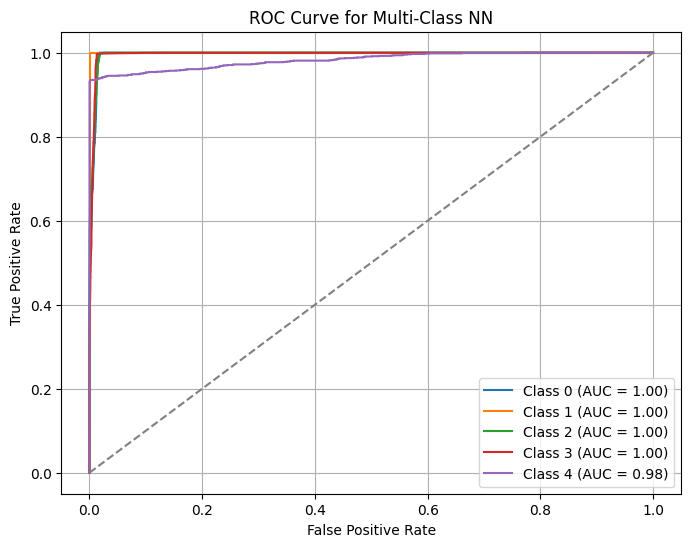

In [ ]:
plt.figure(figsize=(8, 6))
for i in range(cm_NN.shape[0]):
    fpr_i, tpr_i, _ = roc_curve(Y_test == i, y_pred_nn[:, i])
    auc = roc_auc_score(Y_test == i, y_pred_nn[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class NN")
plt.legend()
plt.grid()
plt.show()

## 7.CNN:

In [ ]:
X_train_selected2=X_train_selected.values
X_train_selected2 = X_train_selected2[..., np.newaxis] #3shan x tb2a 3D ha7ot dimension zyada
X_train_selected2.shape

(299728, 13, 1)

In [ ]:
X_test_selected2=X_test_selected.values
X_test_selected2 = X_test_selected2[..., np.newaxis] #3shan x tb2a 3D ha7ot dimension zyada
X_test_selected2.shape

(74933, 13, 1)

In [ ]:
# CNN architecture 
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_selected2.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(Y_train)), activation='softmax')  
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
start_time = time.time()
history = model.fit(X_train_selected2, Y_train, epochs=10, batch_size=32, validation_split=0.2)
training_time_CNN = time.time() - start_time
print(f'Training time: {training_time_CNN:.2f} seconds')


Epoch 1/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.9466 - loss: 0.1551 - val_accuracy: 0.9774 - val_loss: 0.0551
Epoch 2/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.9742 - loss: 0.0609 - val_accuracy: 0.9780 - val_loss: 0.0492
Epoch 3/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.9768 - loss: 0.0560 - val_accuracy: 0.9799 - val_loss: 0.0452
Epoch 4/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9778 - loss: 0.0527 - val_accuracy: 0.9786 - val_loss: 0.0461
Epoch 5/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9794 - loss: 0.0498 - val_accuracy: 0.9855 - val_loss: 0.0420
Epoch 6/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9815 - loss: 0.0470 - val_accuracy: 0.9852 - val_loss: 0.0393
Epoch 7/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.9818 - loss: 0.0460 - val_accuracy: 0.9866 - val_loss: 0.0371
Epoch 8/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9828 - loss: 0

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_selected2, Y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

2342/2342 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9872 - loss: 0.0364
Test Accuracy: 0.9873


In [ ]:
start_time = time.time()
predictions = model.predict(X_test_selected2)
testing_time_CNN = time.time() - start_time
print(f'Testing time: {testing_time_CNN:.2f} seconds')

2342/2342 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Testing time: 4.48 seconds


In [ ]:
y_pred_cnn = np.argmax(predictions, axis=1)

#### Model's Evaluation:

In [ ]:
accuracy_cnn = accuracy_score(Y_test, y_pred_cnn)
balanced_accuracy_cnn = balanced_accuracy_score(Y_test, y_pred_cnn)
precision_cnn = precision_score(Y_test, y_pred_cnn, average='weighted')
recall_cnn = recall_score(Y_test, y_pred_cnn, average='weighted')
f1_cnn = f1_score(Y_test, y_pred_cnn, average='weighted')
roc_auc_cnn = roc_auc_score(Y_test, predictions, multi_class='ovr')
mcc_cnn = matthews_corrcoef(Y_test, y_pred_cnn)

In [ ]:
print(f"Accuracy: {accuracy_cnn:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_cnn:.4f}")
print(f"Precision: {precision_cnn:.4f}")
print(f"Recall: {recall_cnn:.4f}")
print(f"F1-score: {f1_cnn:.4f}")
print(f"ROC-AUC: {roc_auc_cnn:.4f}")
print(f"Matthews Correlation Coefficient: {mcc_cnn:.4f}")

Accuracy: 0.9873
Balanced Accuracy: 0.9206
Precision: 0.9878
Recall: 0.9873
F1-score: 0.9872
ROC-AUC: 0.9947
Matthews Correlation Coefficient: 0.9271


* High Accuracy: With an accuracy of 98.73%, the model performs very well overall, correctly predicting most instances.
* Good Balanced Performance: The balanced accuracy of 92.06% highlights the model's effectiveness across all classes, especially in the presence of potential class imbalances.
* Strong Precision and Recall: The model's precision (98.78%) and recall (98.73%) are nearly identical, meaning it is both highly accurate when predicting positive instances and effective at identifying positive instances.
* Impressive ROC-AUC: The ROC-AUC score of 99.47% demonstrates that the model can effectively distinguish between the positive and negative classes with excellent discriminatory power.
* Excellent MCC: The MCC of 92.71% reflects strong, consistent performance, showing a high correlation between predicted and actual labels.

In [ ]:
cm_cnn = confusion_matrix(Y_test, y_pred_cnn)
print("Confusion Matrix:\n", cm_cnn)

Confusion Matrix:
 [[ 1515     0   495     0     0]
 [    0   659     0     3     0]
 [  182     0  2708    29     0]
 [    5    67    71 67868     3]
 [    1     0     1    93  1233]]


**Class 1 (Row 1):**
* 1515 instances of Class 1 are correctly classified as Class 1.
* 495 instances of Class 1 are misclassified as Class 3.
* No misclassifications to Class 2, Class 4, or Class 5.

**Class 2 (Row 2):**
* 659 instances of Class 2 are correctly classified as Class 2.
* 3 instances of Class 2 are misclassified as Class 4.
* No misclassifications to Class 1, Class 3, or Class 5.

**Class 3 (Row 3):**
* 2708 instances of Class 3 are correctly classified as Class 3.
* 182 instances of Class 3 are misclassified as Class 1.
* 29 instances of Class 3 are misclassified as Class 4.
* No misclassifications to Class 2 or Class 5.

**Class 4 (Row 4):**
* 67868 instances of Class 4 are correctly classified as Class 4.
* 67 instances of Class 4 are misclassified as Class 2.
* 71 instances of Class 4 are misclassified as Class 3.
* 3 instances of Class 4 are misclassified as Class 5.
* 5 instances of Class 4 are misclassified as Class 1.

**Class 5 (Row 5):**
* 1233 instances of Class 5 are correctly classified as Class 5.
* 93 instances of Class 5 are misclassified as Class 4.
* 1 instance of Class 5 is misclassified as Class 1.
* 1 instance of Class 5 is misclassified as Class 3.
* No misclassifications to Class 2.

In [ ]:
loss_cnn = log_loss(Y_test, predictions)
print(f"Log Loss: {loss_cnn}")

Log Loss: 0.03660317919467629


Log Loss of 0.0366 is very low, which suggests that the model's predicted probabilities are very close to the true class labels

In [ ]:
data.loc["CNN"] = [f"{training_time_CNN:.4f}",
                  f"{testing_time_CNN:.4f}",
                  f"{accuracy_cnn:.4f}",
                  f"{balanced_accuracy_cnn:.4f}",
                  f"{precision_cnn:.4f}",
                  f"{recall_cnn:.4f}",f"{f1_nn:.4f}",
                  f"{roc_auc_cnn:.4f}",
                  f"{mcc_cnn:.4f}",
                  f"{loss_cnn:.4f}"]
data.to_excel('/kaggle/working/modelsEvaluation.xlsx')

In [ ]:
# Calculate True Positive Rate (TPR) and False Positive Rate (FPR) for each class
tpr_cnn = []
fpr_cnn = []

# For each class
for i in range(cm_cnn.shape[0]):
    tp = cm_cnn[i, i]  # True Positive for class i
    fn = cm_cnn[i, :].sum() - tp  # False Negatives for class i
    fp = cm_cnn[:, i].sum() - tp  # False Positives for class i
    tn = cm_cnn.sum() - (tp + fn + fp)  # True Negatives for class i
    
    tpr = tp / (tp + fn)  # True Positive Rate (Recall) for class i
    fpr = fp / (fp + tn)  # False Positive Rate for class i
    
    tpr_cnn.append(tpr)
    fpr_cnn.append(fpr)

    print(f"Class {i}: TPR = {tpr:.4f}, FPR = {fpr:.4f}")

Class 0: TPR = 0.7537, FPR = 0.0026
Class 1: TPR = 0.9955, FPR = 0.0009
Class 2: TPR = 0.9277, FPR = 0.0079
Class 3: TPR = 0.9979, FPR = 0.0181
Class 4: TPR = 0.9285, FPR = 0.0000


* Class 1 and Class 3 perform exceptionally well in terms of TPR (99.55% and 99.79%, respectively), with Class 1 having an extremely low FPR (0.09%), which means the model is excellent at identifying Class 1 without misclassifying others as Class 1.
* Class 0 has a moderate TPR (75.37%) and a low FPR (0.26%), indicating room for improvement in identifying this class.
* Class 2 shows good performance with a TPR of 92.77%, though the FPR (0.79%) is slightly higher, showing that the model could still improve in distinguishing it from other classes.
* Class 4 has a strong TPR (92.85%) and an impressive FPR of 0.00%, suggesting that the model performs almost perfectly for Class 4 with no false positives.

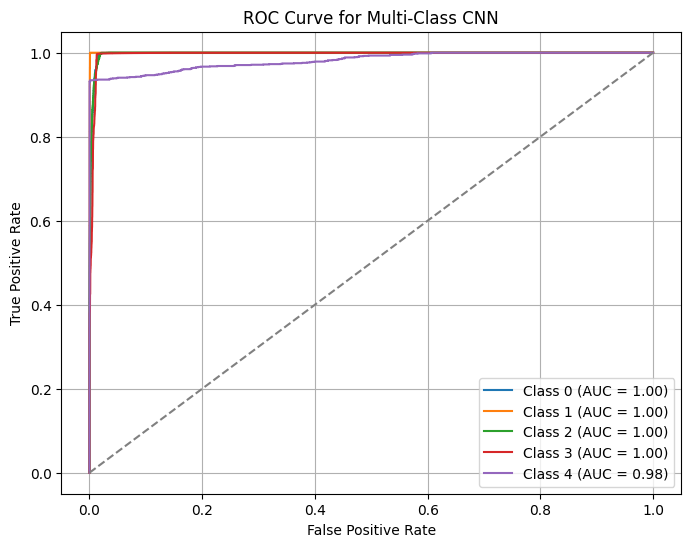

In [ ]:
plt.figure(figsize=(8, 6))
for i in range(cm_cnn.shape[0]):
    fpr_i, tpr_i, _ = roc_curve(Y_test == i, predictions[:, i])
    auc = roc_auc_score(Y_test == i, predictions[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class CNN")
plt.legend()
plt.grid()
plt.show()

## 8.RNN:

In [ ]:
#Convert Data into Sequential Format

sequence_length = 10

# Create sequences grouped by id
X = []
y = []

def create_sequences(features, targets, sequence_length):
    X = []
    y = []
    for i in range(len(features) - sequence_length):
        X.append(features[i : i + sequence_length])  # Take a slice of sequence_length
        y.append(targets[i + sequence_length])  # Take the next target as the label
    return np.array(X), np.array(y)
# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Split into train and test sets
X_train_seq,  Y_train_seq = create_sequences(X_train_selected, Y_train, sequence_length)
X_test_seq,  Y_test_seq = create_sequences(X_train_selected, Y_train, sequence_length)

print(f"Shape of X_train: {X_train_seq.shape}")
print(f"Shape of y_train: {Y_train_seq.shape}")
print(f"Shape of X_test: {X_test_seq.shape}")
print(f"Shape of y_test: {Y_test_seq.shape}")

# Verify shapes
assert X_train_seq.shape[0] == Y_train_seq.shape[0]
assert X_test_seq.shape[0] == Y_test_seq.shape[0]

num_classes = len(np.unique(Y_train))  # Number of unique classes
Y_train_seq = to_categorical(Y_train_seq, num_classes=num_classes)
Y_test_seq = to_categorical(Y_test_seq, num_classes=num_classes)

Shape of X_train: (299718, 10, 13)
Shape of y_train: (299718,)
Shape of X_test: (299718, 10, 13)
Shape of y_test: (299718,)


In [ ]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(sequence_length, X_train_seq.shape[2]), return_sequences=True))
model.add(Dropout(0.3))  # Dropout to reduce overfitting
model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train_seq, Y_train_seq, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_seq, Y_test_seq, verbose=2)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
7493/7493 ━━━━━━━━━━━━━━━━━━━━ 141s 18ms/step - accuracy: 0.9027 - loss: 0.5092 - val_accuracy: 0.9078 - val_loss: 0.4249
Epoch 2/5
7493/7493 ━━━━━━━━━━━━━━━━━━━━ 133s 18ms/step - accuracy: 0.9073 - loss: 0.4348 - val_accuracy: 0.9078 - val_loss: 0.4251
Epoch 3/5
7493/7493 ━━━━━━━━━━━━━━━━━━━━ 136s 18ms/step - accuracy: 0.9075 - loss: 0.4321 - val_accuracy: 0.9078 - val_loss: 0.4246
Epoch 4/5
7493/7493 ━━━━━━━━━━━━━━━━━━━━ 135s 18ms/step - accuracy: 0.9081 - loss: 0.4302 - val_accuracy: 0.9078 - val_loss: 0.4247
Epoch 5/5
7493/7493 ━━━━━━━━━━━━━━━━━━━━ 136s 18ms/step - accuracy: 0.9075 - loss: 0.4307 - val_accuracy: 0.9078 - val_loss: 0.4246
9367/9367 - 62s - 7ms/step - accuracy: 0.9077 - loss: 0.4248
Test Loss: 0.4247566759586334
Test Accuracy: 0.9076598882675171


In [ ]:
# Define the RNN model
model = Sequential()
model.add(SimpleRNN(128, activation='relu', input_shape=(sequence_length, X_train_seq.shape[2]), return_sequences=True))
model.add(Dropout(0.3))  # Dropout to reduce overfitting
model.add(SimpleRNN(64, activation='relu', return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))  # Additional dense layer for complexity
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
start_time = time.time()
history = model.fit(X_train_seq, Y_train_seq, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_seq, Y_test_seq, verbose=2)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

training_time_RNN = time.time() - start_time
print(f'training time: {training_time_RNN}')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
7493/7493 ━━━━━━━━━━━━━━━━━━━━ 63s 8ms/step - accuracy: 0.8905 - loss: 0.5175 - val_accuracy: 0.9078 - val_loss: 0.4251
Epoch 2/5
7493/7493 ━━━━━━━━━━━━━━━━━━━━ 60s 8ms/step - accuracy: 0.9079 - loss: 0.4396 - val_accuracy: 0.9078 - val_loss: 0.4260
Epoch 3/5
7493/7493 ━━━━━━━━━━━━━━━━━━━━ 60s 8ms/step - accuracy: 0.9073 - loss: 0.4363 - val_accuracy: 0.9078 - val_loss: 0.4245
Epoch 4/5
7493/7493 ━━━━━━━━━━━━━━━━━━━━ 60s 8ms/step - accuracy: 0.9090 - loss: 0.4282 - val_accuracy: 0.9078 - val_loss: 0.4254
Epoch 5/5
7493/7493 ━━━━━━━━━━━━━━━━━━━━ 60s 8ms/step - accuracy: 0.9076 - loss: 0.4302 - val_accuracy: 0.9078 - val_loss: 0.4246
9367/9367 - 24s - 3ms/step - accuracy: 0.9077 - loss: 0.4247
Test Loss: 0.42473578453063965
Test Accuracy: 0.9076598882675171
training time: 327.99870586395264


In [ ]:
# Get probability predictions for the test set
y_pred_proba_rnn = model.predict(X_test_seq)

9367/9367 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step


In [ ]:
start_time = time.time()
y_pred_rnn = np.argmax(model.predict(X_test_seq), axis=1)
testing_time_RNN = time.time() - start_time
print(f'testing time: {testing_time_RNN}')

9367/9367 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step
testing time: 29.222124814987183


In [ ]:
Y_test_seq

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [ ]:
y_pred_rnn

array([3, 3, 3, ..., 3, 3, 3])

In [ ]:
y_pred_proba_rnn

array([[0.03039867, 0.01010854, 0.04465655, 0.89503294, 0.01980321],
       [0.02932477, 0.0091764 , 0.04228494, 0.900298  , 0.01891586],
       [0.02865824, 0.00900152, 0.04176315, 0.90252984, 0.01804726],
       ...,
       [0.02746009, 0.00837628, 0.04018512, 0.90656126, 0.01741733],
       [0.02833428, 0.00898786, 0.04096359, 0.9039065 , 0.01780778],
       [0.02883288, 0.00910923, 0.04246378, 0.901429  , 0.01816517]],
      dtype=float32)

In [ ]:
Y_test_seq = np.argmax(Y_test_seq, axis=1)  # For one-hot encoded labels

In [ ]:
Y_test_seq

array([3, 3, 3, ..., 3, 3, 3])

#### Model's Evaluation:

In [ ]:
accuracy_rnn = accuracy_score(Y_test_seq, y_pred_rnn)
balanced_accuracy_rnn = balanced_accuracy_score(Y_test_seq, y_pred_rnn)
precision_rnn = precision_score(Y_test_seq, y_pred_rnn, average='weighted')
recall_rnn = recall_score(Y_test_seq, y_pred_rnn, average='weighted')
f1_rnn = f1_score(Y_test_seq, y_pred_rnn, average='weighted')
roc_auc_rnn = roc_auc_score(Y_test_seq, y_pred_proba_rnn, multi_class='ovr')
mcc_rnn = matthews_corrcoef(Y_test_seq, y_pred_rnn)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(f"Accuracy: {accuracy_rnn:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_rnn:.4f}")
print(f"Precision: {precision_rnn:.4f}")
print(f"Recall: {recall_rnn:.4f}")
print(f"F1-score: {f1_rnn:.4f}")
print(f"ROC-AUC: {roc_auc_rnn:.4f}")
print(f"Matthews Correlation Coefficient: {mcc_rnn:.4f}")

Accuracy: 0.9077
Balanced Accuracy: 0.2000
Precision: 0.8238
Recall: 0.9077
F1-score: 0.8637
ROC-AUC: 0.5154
Matthews Correlation Coefficient: 0.0000


* Accuracy: A 90.77% accuracy could initially seem promising, but it doesn't tell the full story in cases of class imbalance.
* Balanced Accuracy: The balanced accuracy of 20% indicates poor performance across different classes, with the model likely overfitting to the majority class.
* Precision and Recall: The precision of 82.38% and recall of 90.77% show that the model is somewhat effective in identifying positives, but it could still be struggling with false positives and handling class imbalance.
* F1-Score: A F1-score of 86.37% indicates a decent trade-off between precision and recall, but again, this might be misleading due to class imbalance.
* ROC-AUC: The ROC-AUC score of 51.54% suggests that the model is almost as bad as random guessing in terms of distinguishing between the positive and negative classes.
* MCC: An MCC of 0 implies that the model’s predictions are not meaningfully aligned with the actual outcomes, and it is performing poorly overall.

In [ ]:
cm_rnn = confusion_matrix(Y_test_seq, y_pred_rnn)
print("Confusion Matrix:\n", cm_rnn)

Confusion Matrix:
 [[     0      0      0   8039      0]
 [     0      0      0   2650      0]
 [     0      0      0  11677      0]
 [     0      0      0 272042      0]
 [     0      0      0   5310      0]]


**Class 1 (Row 1):**
* 8039 instances of Class 1 are misclassified as Class 4.
* No instances of Class 1 are predicted as Class 1, Class 2, or Class 3.
  
**Class 2 (Row 2):**
* 2650 instances of Class 2 are misclassified as Class 4.
* No instances of Class 2 are predicted as Class 1, Class 2, or Class 3.
  
**Class 3 (Row 3):**
* 11677 instances of Class 3 are misclassified as Class 4.
* No instances of Class 3 are predicted as Class 1, Class 2, or Class 3.
  
**Class 4 (Row 4):**
* 272042 instances of Class 4 are correctly classified as Class 4.
* No instances of Class 4 are predicted as any other class (Class 1, Class 2, or Class 3).
  
**Class 5 (Row 5):**
* 5310 instances of Class 5 are misclassified as Class 4.
* No instances of Class 5 are predicted as Class 1, Class 2, or Class 3

In [ ]:
loss_rnn = log_loss(Y_test_seq, y_pred_proba_rnn)
print(f"Log Loss: {loss_rnn}")

Log Loss: 0.42473695441738046


A Log Loss of 0.4247 indicates the model’s predictions are not optimal. The misclassifications of multiple classes as Class 4 lead to this moderate Log Loss.

In [ ]:
data.loc["RNN"] = [f"{training_time_RNN:.4f}",
                  f"{testing_time_RNN:.4f}",
                  f"{accuracy_rnn:.4f}",
                  f"{balanced_accuracy_rnn:.4f}",
                  f"{precision_rnn:.4f}",
                  f"{recall_rnn:.4f}",f"{f1_nn:.4f}",
                  f"{roc_auc_rnn:.4f}",
                  f"{mcc_rnn:.4f}",
                  f"{loss_rnn:.4f}"]
data.to_excel('/kaggle/working/modelsEvaluation.xlsx')

In [ ]:
# Calculate True Positive Rate (TPR) and False Positive Rate (FPR) for each class
tpr_rnn = []
fpr_rnn = []

# For each class
for i in range(cm_rnn.shape[0]):
    tp = cm_rnn[i, i]  # True Positive for class i
    fn = cm_rnn[i, :].sum() - tp  # False Negatives for class i
    fp = cm_rnn[:, i].sum() - tp  # False Positives for class i
    tn = cm_rnn.sum() - (tp + fn + fp)  # True Negatives for class i
    
    tpr = tp / (tp + fn)  # True Positive Rate (Recall) for class i
    fpr = fp / (fp + tn)  # False Positive Rate for class i
    
    tpr_rnn.append(tpr)
    fpr_rnn.append(fpr)

    print(f"Class {i}: TPR = {tpr:.4f}, FPR = {fpr:.4f}")

Class 0: TPR = 0.0000, FPR = 0.0000
Class 1: TPR = 0.0000, FPR = 0.0000
Class 2: TPR = 0.0000, FPR = 0.0000
Class 3: TPR = 1.0000, FPR = 1.0000
Class 4: TPR = 0.0000, FPR = 0.0000


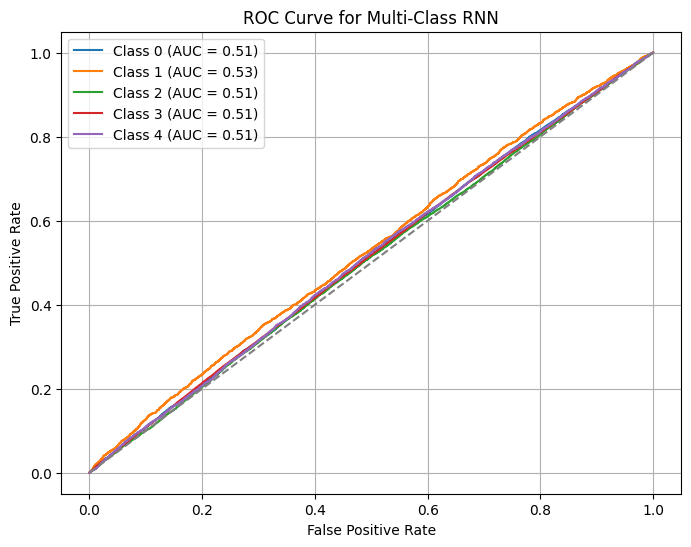

In [ ]:
plt.figure(figsize=(8, 6))
for i in range(cm_rnn.shape[0]):
    fpr_i, tpr_i, _ = roc_curve(Y_test_seq == i, y_pred_proba_rnn[:, i])
    auc = roc_auc_score(Y_test_seq == i, y_pred_proba_rnn[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class RNN")
plt.legend()
plt.grid()
plt.show()

# Evaluation


In [ ]:
data

,training time,testing time,Accuracy,Balanced Accuracy,Precision,Recall,F1-score,ROC-AUC,matthews_corrcoef,Log loss
Logistic regression,36.7079,0.0102,0.9517,0.8946,0.9634,0.9517,0.9559,0.9883,0.7663,0.2190
decision tree,1.6582,0.0108,0.9943,0.9698,0.9944,0.9943,0.9943,0.9848,0.9672,0.2054
Random Forest,38.0232,1.0556,0.9972,0.9815,0.9972,0.9972,0.9971,0.9966,0.9836,0.0296
SVM,6.2726,0.0093,0.9664,0.8118,0.9642,0.9664,0.9644,0.9888,0.7991,0.5312
KNN,1.1891,38.3229,0.9939,0.9545,0.9939,0.9939,0.9939,0.9927,0.9647,0.0732
CNN,277.6292,4.4833,0.9873,0.9206,0.9878,0.9873,0.9822,0.9947,0.9271,0.0366
NN,162.2496,2.8832,0.9822,0.9055,0.9851,0.9822,0.9822,0.9943,0.8983,0.0380
RNN,327.9987,29.2221,0.9077,0.2000,0.8238,0.9077,0.9822,0.5154,0.0000,0.4247


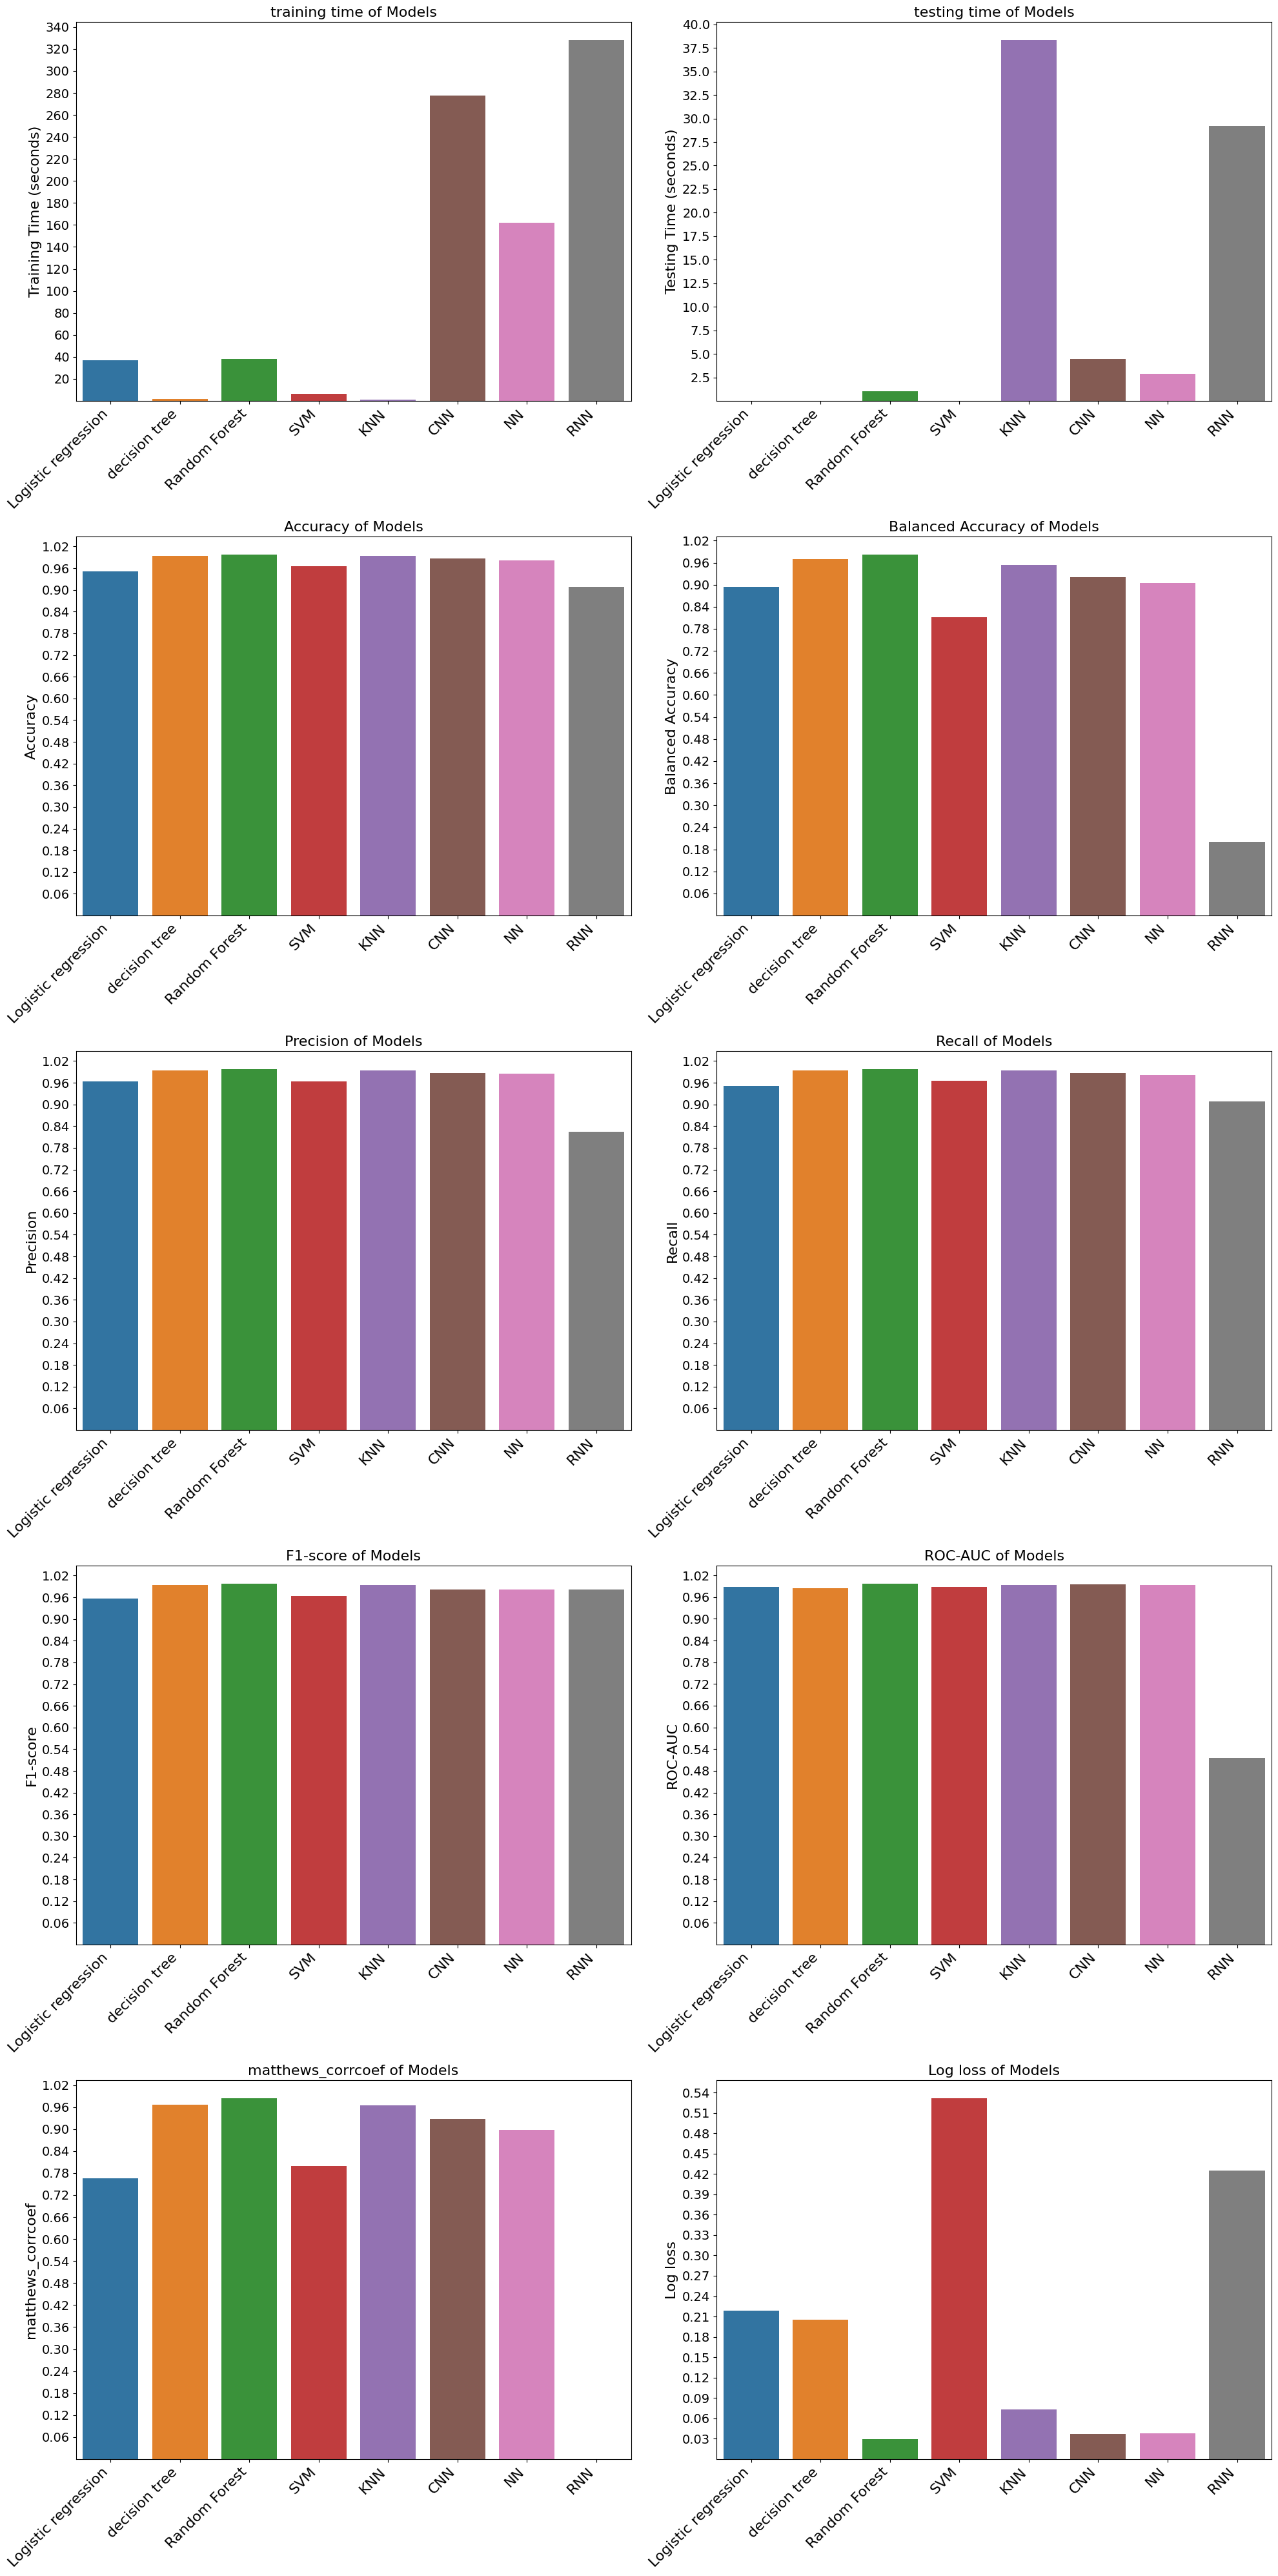

In [ ]:
# Ensure data is numeric
data = data.apply(pd.to_numeric)

# Set up a 5x2 layout
fig, axes = plt.subplots(5, 2, figsize=(20, 40))

# Flatten the axes for easy indexing
axes = axes.flatten()

# Titles and metrics
metrics = [
    ('training time', 'Training Time (seconds)'),
    ('testing time', 'Testing Time (seconds)'),
    ('Accuracy', 'Accuracy'),
    ('Balanced Accuracy', 'Balanced Accuracy'),
    ('Precision', 'Precision'),
    ('Recall', 'Recall'),
    ('F1-score', 'F1-score'),
    ('ROC-AUC', 'ROC-AUC'),
    ('matthews_corrcoef', 'matthews_corrcoef'),
    ('Log loss', 'Log loss')
]

# Loop through metrics and plot
for i, (metric, ylabel) in enumerate(metrics):
    sns.barplot(x=data.index, y=metric, data=data, ax=axes[i])
    axes[i].set_title(f'{metric} of Models', fontsize=16)
    axes[i].set_ylabel(ylabel, fontsize=16)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right', fontsize=16)
    axes[i].tick_params(axis='y', labelsize=14)  # Reduce font size for y-axis numbers
    
    # Set smaller step size for y-axis ticks
    axes[i].yaxis.set_major_locator(ticker.MaxNLocator(nbins=20, prune='both'))  # Adjust nbins as needed

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Visualizing Training Time vs Accuracy

/tmp/ipykernel_24/3144486791.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(data["training time"][i], data["Accuracy"][i], model, fontsize=8)


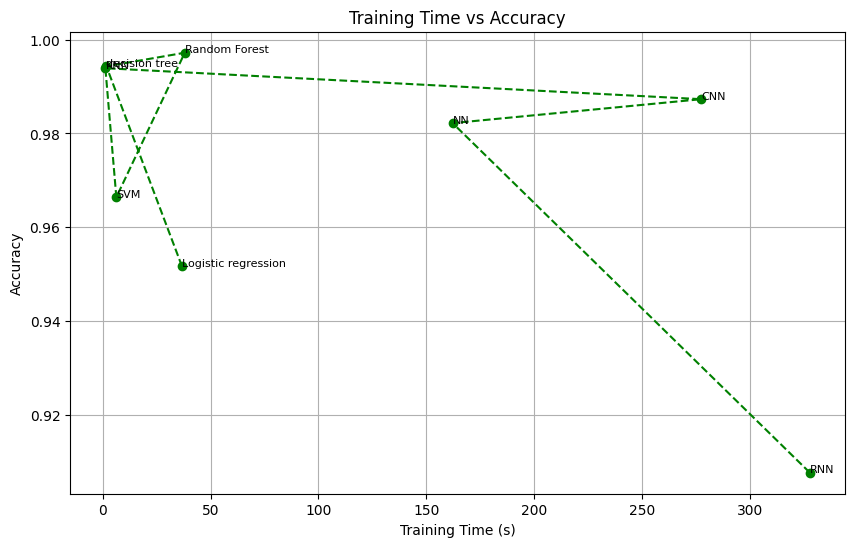

In [ ]:
# Plot training time vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(data["training time"], data["Accuracy"], marker='o', linestyle='--', color='g')

# Annotate model names
for i, model in enumerate(data.index):
    plt.text(data["training time"][i], data["Accuracy"][i], model, fontsize=8)
    
plt.xlabel("Training Time (s)")
plt.ylabel("Accuracy")
plt.title("Training Time vs Accuracy")
plt.grid()
plt.show()

### ROC-AUC Across Models


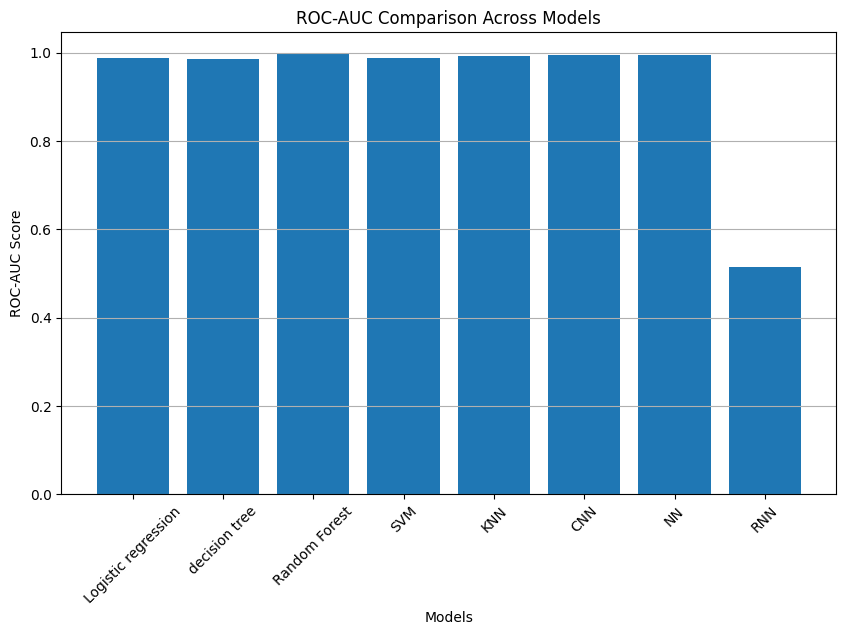

In [ ]:
# Bar plot for ROC-AUC comparison
plt.figure(figsize=(10, 6))
plt.bar(data.index, data["ROC-AUC"])

plt.xlabel("Models")
plt.ylabel("ROC-AUC Score")
plt.title("ROC-AUC Comparison Across Models")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


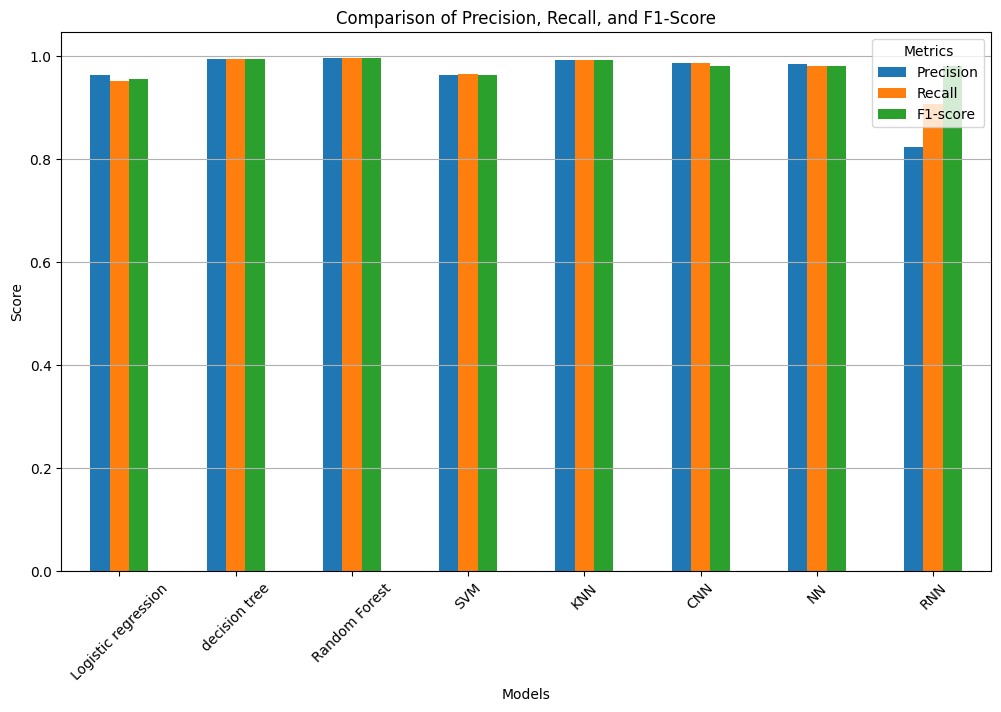

In [ ]:
# Plot Precision, Recall, and F1-Score
metrics = ["Precision", "Recall", "F1-score"]
data_metrics = data[metrics]

# Create a grouped bar plot
data_metrics.plot(kind='bar', figsize=(12, 7))

plt.title("Comparison of Precision, Recall, and F1-Score")
plt.xlabel("Models")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.grid(axis='y')
plt.show()


/tmp/ipykernel_24/1653020521.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(data["testing time"][i], data["Balanced Accuracy"][i], model, fontsize=10)


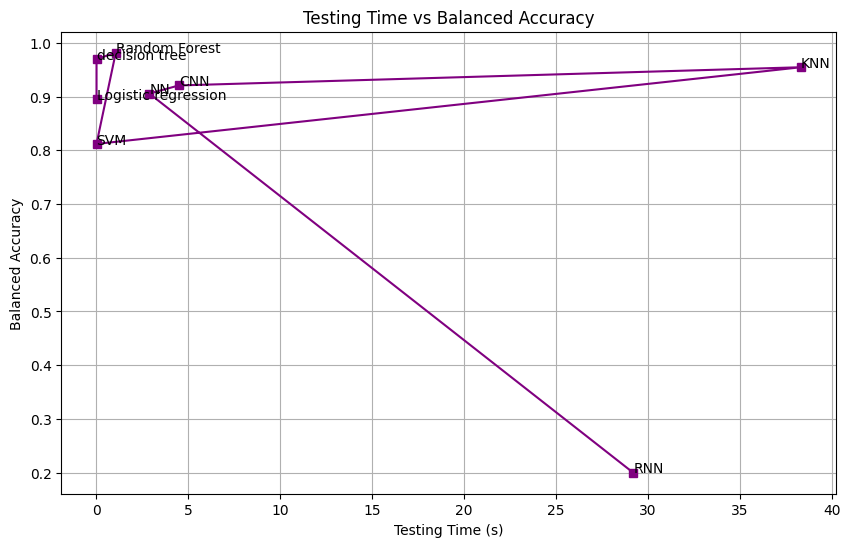

In [ ]:
# Plot Testing Time vs Balanced Accuracy
plt.figure(figsize=(10, 6))
plt.plot(data["testing time"], data["Balanced Accuracy"], marker='s', linestyle='-', color='purple')

# Annotate model names
for i, model in enumerate(data.index):
    plt.text(data["testing time"][i], data["Balanced Accuracy"][i], model, fontsize=10)

plt.xlabel("Testing Time (s)")
plt.ylabel("Balanced Accuracy")
plt.title("Testing Time vs Balanced Accuracy")
plt.grid()
plt.show()
